In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('trimmed_data.csv')

In [3]:
df.head()

,Unnamed: 0,stop_date,county_name,county_fips,driver_gender,driver_age_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,contraband_found,stop_outcome,is_arrested,ethnicity
0,0,2013-01-01,San Diego County,6073.0,M,25-32,Hispanic,Mechanical or Nonmoving Violation (VC),Equipment,False,No Search,False,CHP 215,False,H
1,1,2013-01-01,San Diego County,6073.0,F,33-39,Black,Moving Violation (VC),Moving violation,False,No Search,False,CHP 215,False,B
2,2,2013-01-01,San Diego County,6073.0,M,25-32,White,Moving Violation (VC),Moving violation,False,No Search,False,CHP 215,False,W
3,3,2013-01-01,San Diego County,6073.0,M,49+,White,Mechanical or Nonmoving Violation (VC),Equipment,False,No Search,False,CHP 215,False,W
4,4,2013-01-01,San Diego County,6073.0,M,40-48,Black,Mechanical or Nonmoving Violation (VC),Equipment,False,No Search,False,CHP 215,False,B


In [100]:
funnel_df = df[['driver_race', 'driver_gender', 'driver_age_raw', 'search_conducted', 'contraband_found', 'is_arrested']]

## Question 1.1: What is the probability of getting pulled over by race, conditional on living in california?

In [29]:
racial_percentage_estimates = {
    'White': 0.401,
    'Black': 0.062,
    'Asian': 0.130,
    'Hispanic': 0.376,
    'Other': 0.01,
}

total_population = 39300000

population_by_race = {k: v * total_population for k, v in racial_percentage_estimates.items()}
population_by_race

{'Asian': 5109000.0,
 'Black': 2436600.0,
 'Hispanic': 14776800.0,
 'Other': 393000.0,
 'White': 15759300.0}

In [43]:
races = ['Asian', 'Black', 'Hispanic', 'White']
stops_by_race = dict(df.groupby('driver_race')['stop_date'].count())
stops_by_race

{'Asian': 1012306,
 'Black': 1221604,
 'Hispanic': 4954207,
 'Other': 1163969,
 'White': 6184252}

In [176]:
def barchart(data, title):
    categories = list(data.keys())
    categories = sorted(categories)
    plt.style.use('seaborn')
    plt.figure(dpi=200)
    plt.bar(range(len(categories)), [data[key] for key in categories], align='center')
    plt.xticks(range(len(categories)), categories)
    plt.title(title, fontsize=24, fontname='Pier Sans')
    plt.show()

In [207]:
import numpy as np

def gini(data):
    """Calculate the Gini coefficient of a list"""
    # Can't be negative
    data = [np.abs(x) for x in data]
    # Values cannot be 0:
    data = [x + 0.0000001 for x in data]
    # Values must be sorted:
    array = np.sort(data)
    # Index per array element:
    index = np.arange(1,array.shape[0]+1)
    # Number of array elements:
    n = array.shape[0]
    # Gini coefficient:
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))

In [33]:
percentage_stopped_by_race = {k: stops_by_race[k] / population_by_race[k] for k in races}
percentage_stopped_by_race

{'Asian': 0.1981417107065962,
 'Black': 0.50135598785192481,
 'Hispanic': 0.3352692734556873,
 'Other': 2.9617531806615776,
 'White': 0.39241920643683414}

/usr/local/bin/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Pier Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


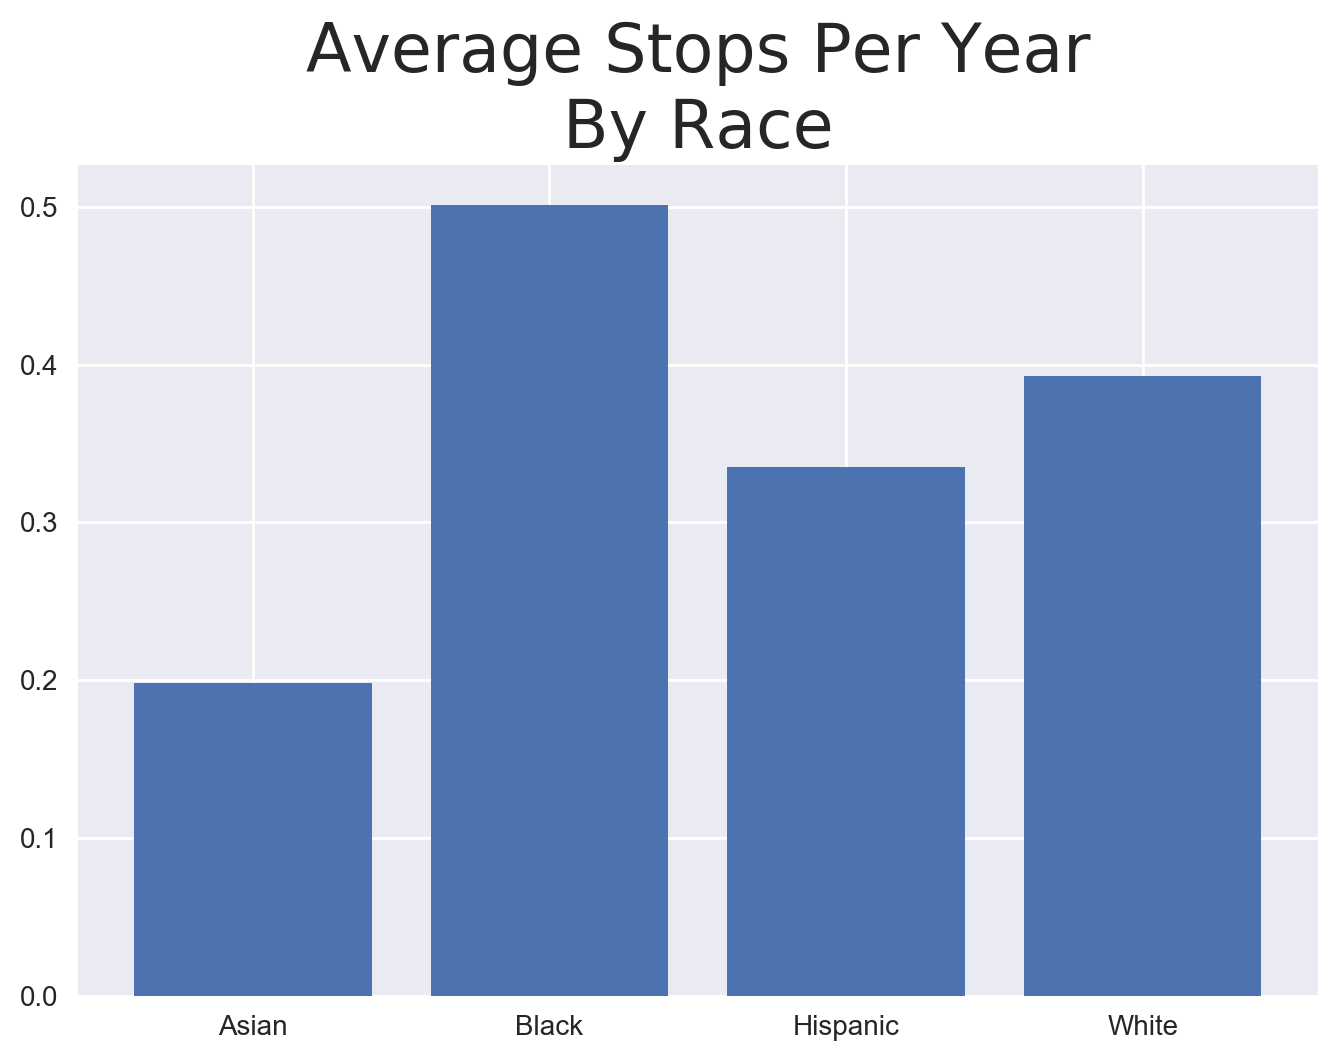

In [68]:
barchart(percentage_stopped_by_race, "Average Stops Per Year\nBy Race")

## Question 1.2: What is the probability of being searched by race, conditional on being pulled over?

In [41]:
searches_by_race = dict(funnel_df[funnel_df['search_conducted'] == True].groupby('driver_race')['search_conducted'].count())
searched_by_race

{'Asian': 19100,
 'Black': 53461,
 'Hispanic': 222618,
 'Other': 21985,
 'White': 161563}

In [46]:
percentage_searched_by_race = {k: searches_by_race[k] / stops_by_race[k] for k in races}
percentage_searched_by_race

{'Asian': 0.018867812696951317,
 'Black': 0.043762954279782974,
 'Hispanic': 0.044935143000686087,
 'White': 0.026124905647441275}

/usr/local/bin/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Pier Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


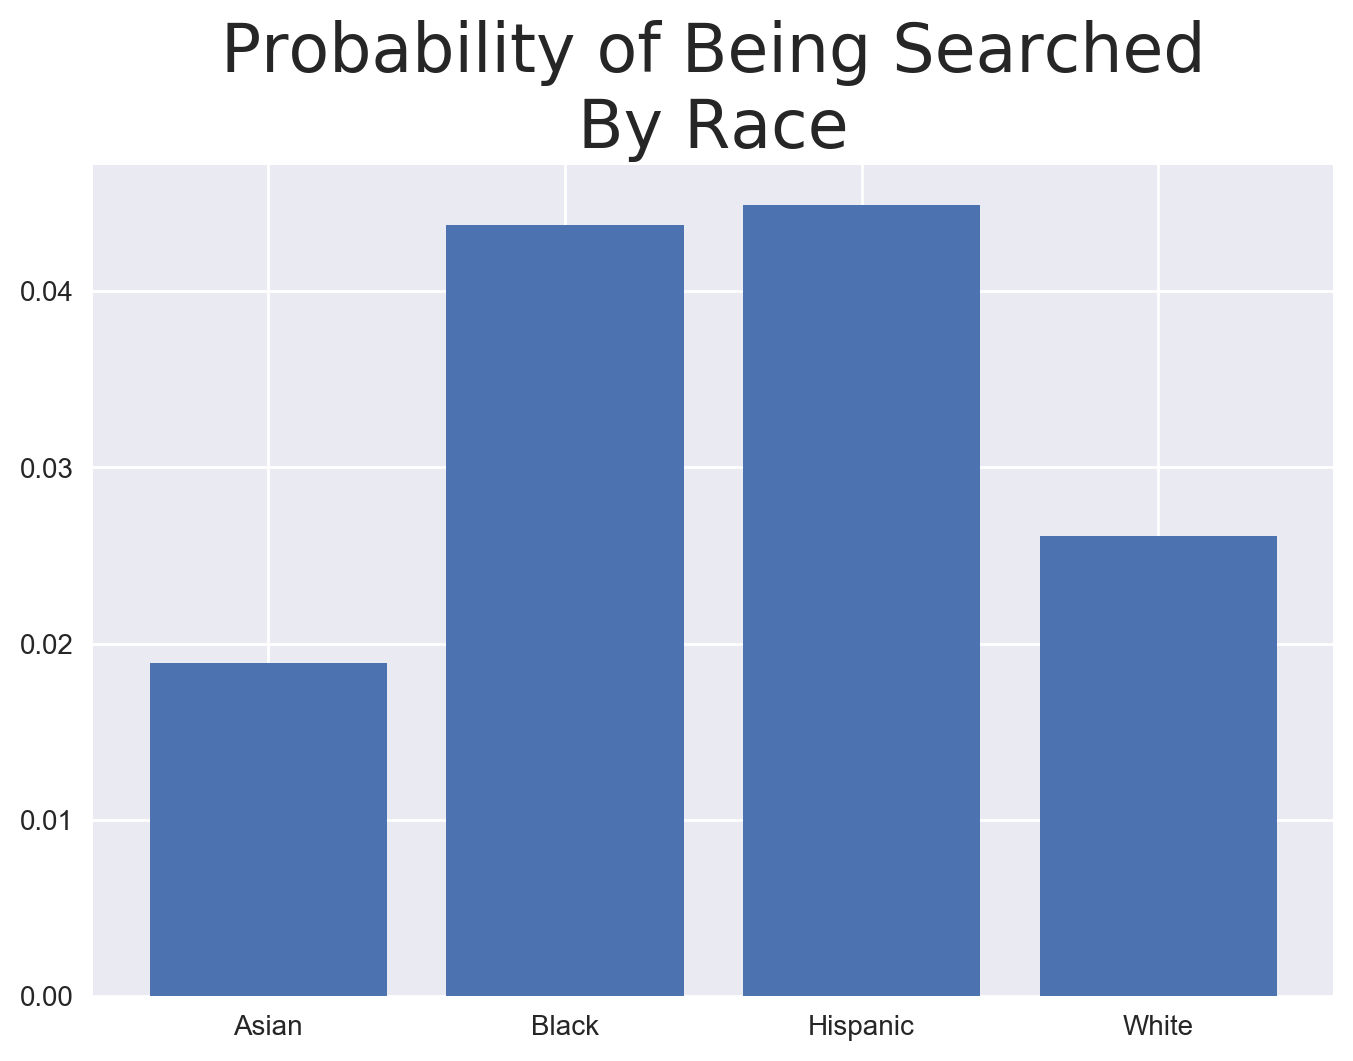

In [69]:
barchart(percentage_searched_by_race, "Probability of Being Searched\nBy Race")

## Question 1.3: What is the probability a driver has contraband by race, given they have been searched

In [56]:
contraband_by_race = dict(funnel_df[(funnel_df['search_conducted'] == True) & (funnel_df['contraband_found'] == True)].groupby('driver_race')['search_conducted'].count())
contraband_by_race

{'Asian': 569, 'Black': 1954, 'Hispanic': 5708, 'Other': 813, 'White': 6207}

In [57]:
percentage_contraband_by_race = {k: contraband_by_race[k] / searches_by_race[k] for k in races}
percentage_contraband_by_race

{'Asian': 0.029790575916230366,
 'Black': 0.036550008417350968,
 'Hispanic': 0.025640334564141266,
 'White': 0.038418449768820834}

/usr/local/bin/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Pier Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


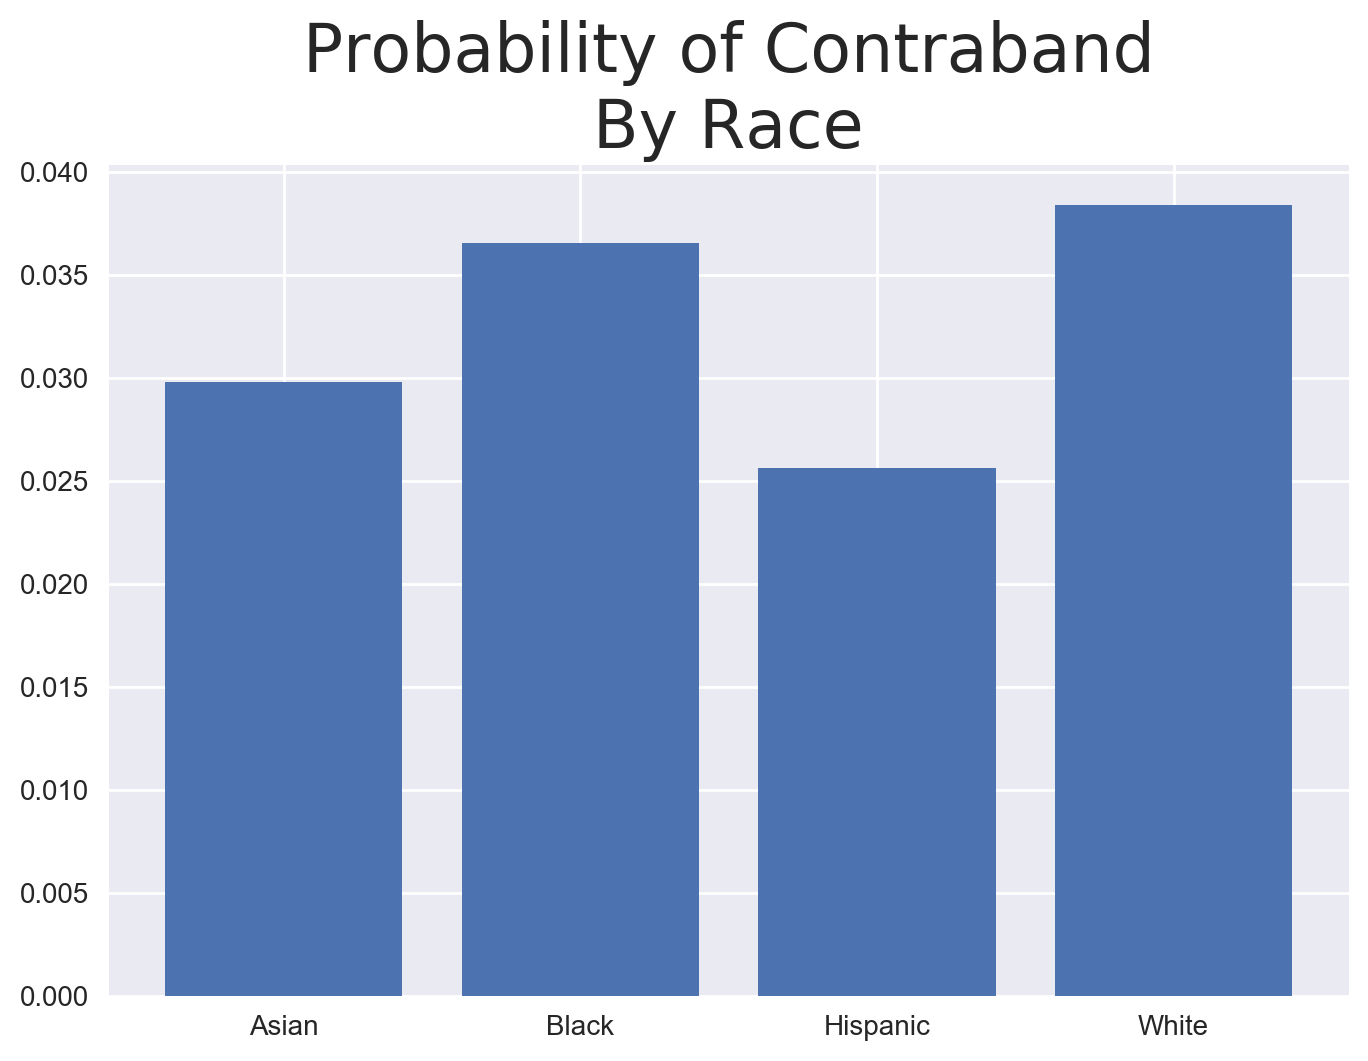

In [70]:
barchart(percentage_contraband_by_race, "Probability of Contraband\nBy Race")

## Question 1.4: What is the probability a driver is arrested by race, given they have been found to have contraband?

In [64]:
arrests_by_race = dict(funnel_df[(funnel_df['contraband_found'] == True) & (funnel_df['is_arrested'] == True)].groupby('driver_race')['driver_race'].count())
arrests_by_race

{'Asian': 254, 'Black': 650, 'Hispanic': 2779, 'Other': 285, 'White': 2022}

In [65]:
percentage_arrested_by_race = {k: arrests_by_race[k] / contraband_by_race[k] for k in races}
percentage_arrested_by_race

{'Asian': 0.44639718804920914,
 'Black': 0.33265097236438074,
 'Hispanic': 0.48686054660126138,
 'White': 0.32576123731271145}

/usr/local/bin/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Pier Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


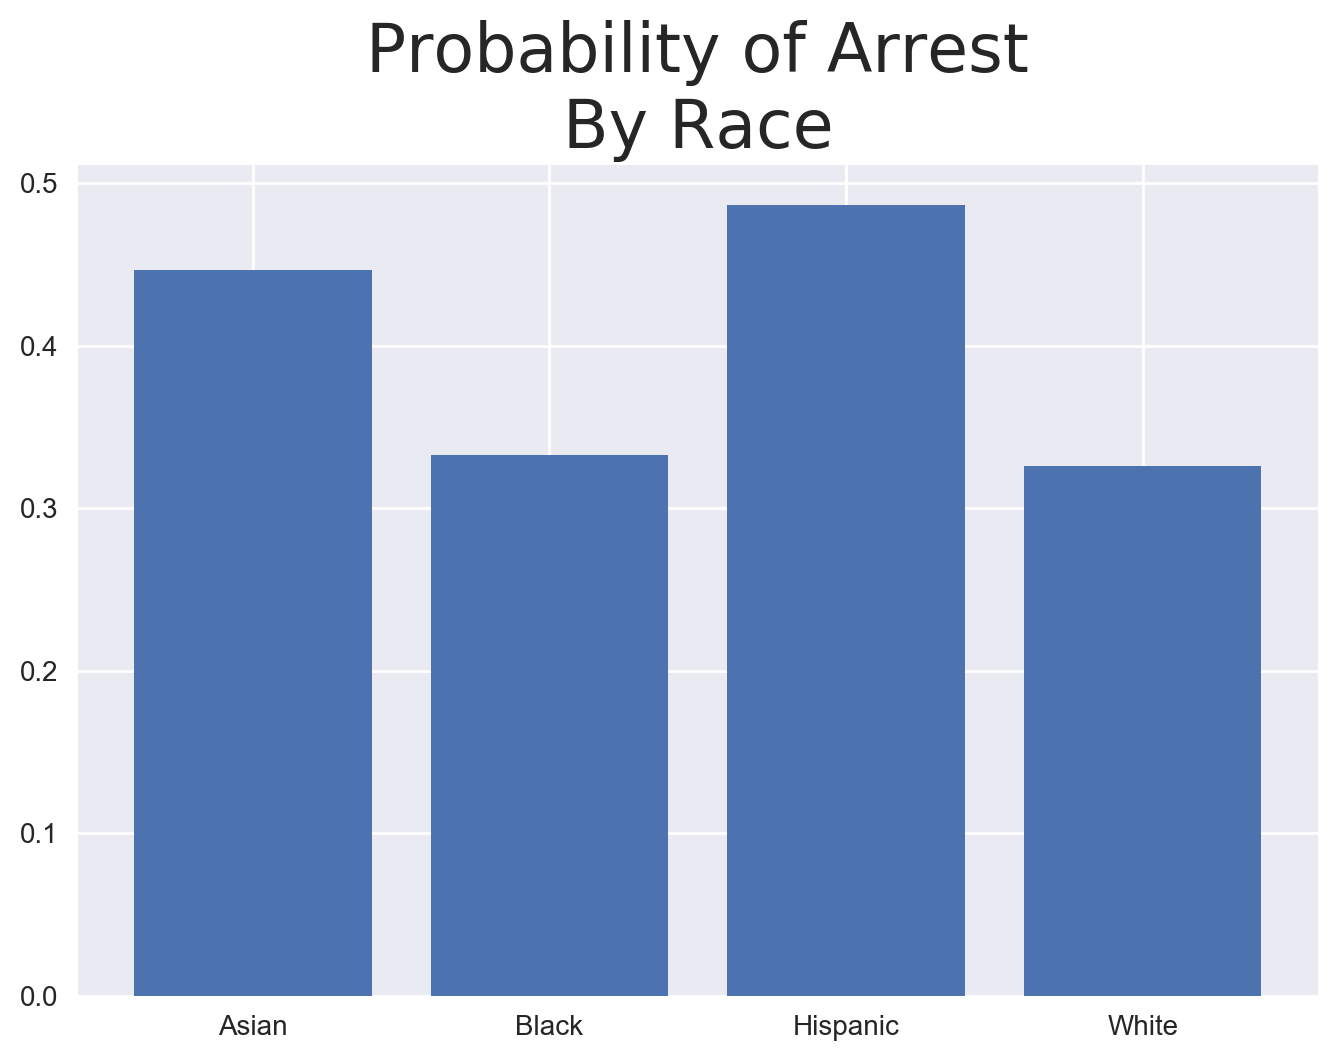

In [71]:
barchart(percentage_arrested_by_race, "Probability of Arrest\nBy Race")

In [209]:
gini(percentage_arrested_by_race.values())

0.093776350372776623

# Question 2: How is the experience of getting of getting pulled over different across age? 

## Question 2.1: What is the age makeup of people who got pulled over?

In [192]:
ages = df['driver_age_raw'].unique()
ages

array(['25-32', '33-39', '49+', '40-48', '15-25', '0-14'], dtype=object)

In [101]:
age_dict = {
    '0-14': 14,
    '15-25': 20,
    '25-32': 29,
    '33-39': 36,
    '40-48': 44,
    '49+': 54,
}

In [152]:
funnel_df['driver_age'] = funnel_df['driver_age_raw'].apply(lambda x: age_dict[x])
decompress = np.random.normal(loc=0, scale=4, size=len(funnel_df['driver_age']))
funnel_df['driver_age'] += decompress
funnel_df['driver_age'] = funnel_df['driver_age'].apply(lambda x: x if x > 13 else x + 13)

/usr/local/bin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/bin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/bin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [84]:
noise = np.random.normal(loc=0, scale=4, size=len(driver_age))
driver_age += noise

In [106]:
driver_age_sample = driver_age.sample(n=1000)

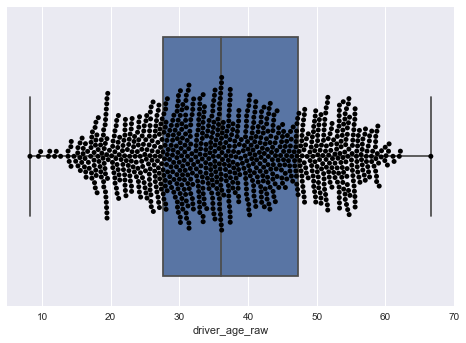

In [107]:
sns.boxplot(driver_age_sample)
sns.swarmplot(driver_age_sample, color='black')
plt.show()

## Question 2.2: What is the age distribution of those that are searched, and how does it differ from those that are not searched?

In [154]:
search_sample = funnel_df[['driver_age', 'search_conducted']].sample(n=1000)
search_sample.head()

,driver_age,search_conducted
8393222,18.950940,False
13656229,32.761586,False
2201446,26.851182,False
4489038,20.875953,False
4826715,52.903429,False


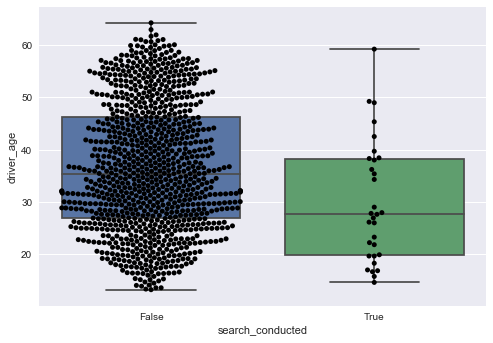

In [155]:
sns.boxplot(y='driver_age', x='search_conducted', data=search_sample)
sns.swarmplot(y='driver_age', x='search_conducted', data=search_sample, color='black')
plt.show()

## Question 2.3: What is the probability of being stopped by age group, conditional on living in california?

In [196]:
population_by_age = [.13, .13, .15, .14, .13, .13, .1, .06, .03]
shifted_population_by_age = {
    '0-14': population_by_age[0] + (population_by_age[1] * 0.5),
    '15-25': (population_by_age[1] * 0.5) + (population_by_age[2] * 0.55),
    '25-32': (population_by_age[2] * 0.45) + (population_by_age[3] * 0.3),
    '33-39': (population_by_age[3] * 0.7),
    '40-48': (population_by_age[4] * 0.9),
    '49+': (population_by_age[4] * 0.1) + sum(population_by_age[5:])
}
population_by_age = {k: shifted_population_by_age[k] * total_population for k in shifted_population_by_age}
population_by_age

{'0-14': 7663500.0,
 '15-25': 5796750.000000001,
 '25-32': 4303350.000000001,
 '33-39': 3851400.0,
 '40-48': 4598100.0,
 '49+': 13086900.000000004}

In [167]:
stops_by_age_group = funnel_df.groupby('driver_age_raw')['driver_age_raw'].count()
stops_by_age_group

driver_age_raw
0-14       24743
15-25    2423934
25-32    3437799
33-39    2721297
40-48    2698382
49+      3230183
Name: driver_age_raw, dtype: int64

In [197]:
percentage_stopped_by_age = {k: stops_by_age_group[k] / population_by_age[k] for k in population_by_age}
percentage_stopped_by_age

{'0-14': 0.0032286814118875186,
 '15-25': 0.41815396558416346,
 '25-32': 0.79886576736728343,
 '33-39': 0.70657345380900449,
 '40-48': 0.58684717600748137,
 '49+': 0.24682568064247445}

/usr/local/bin/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Pier Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


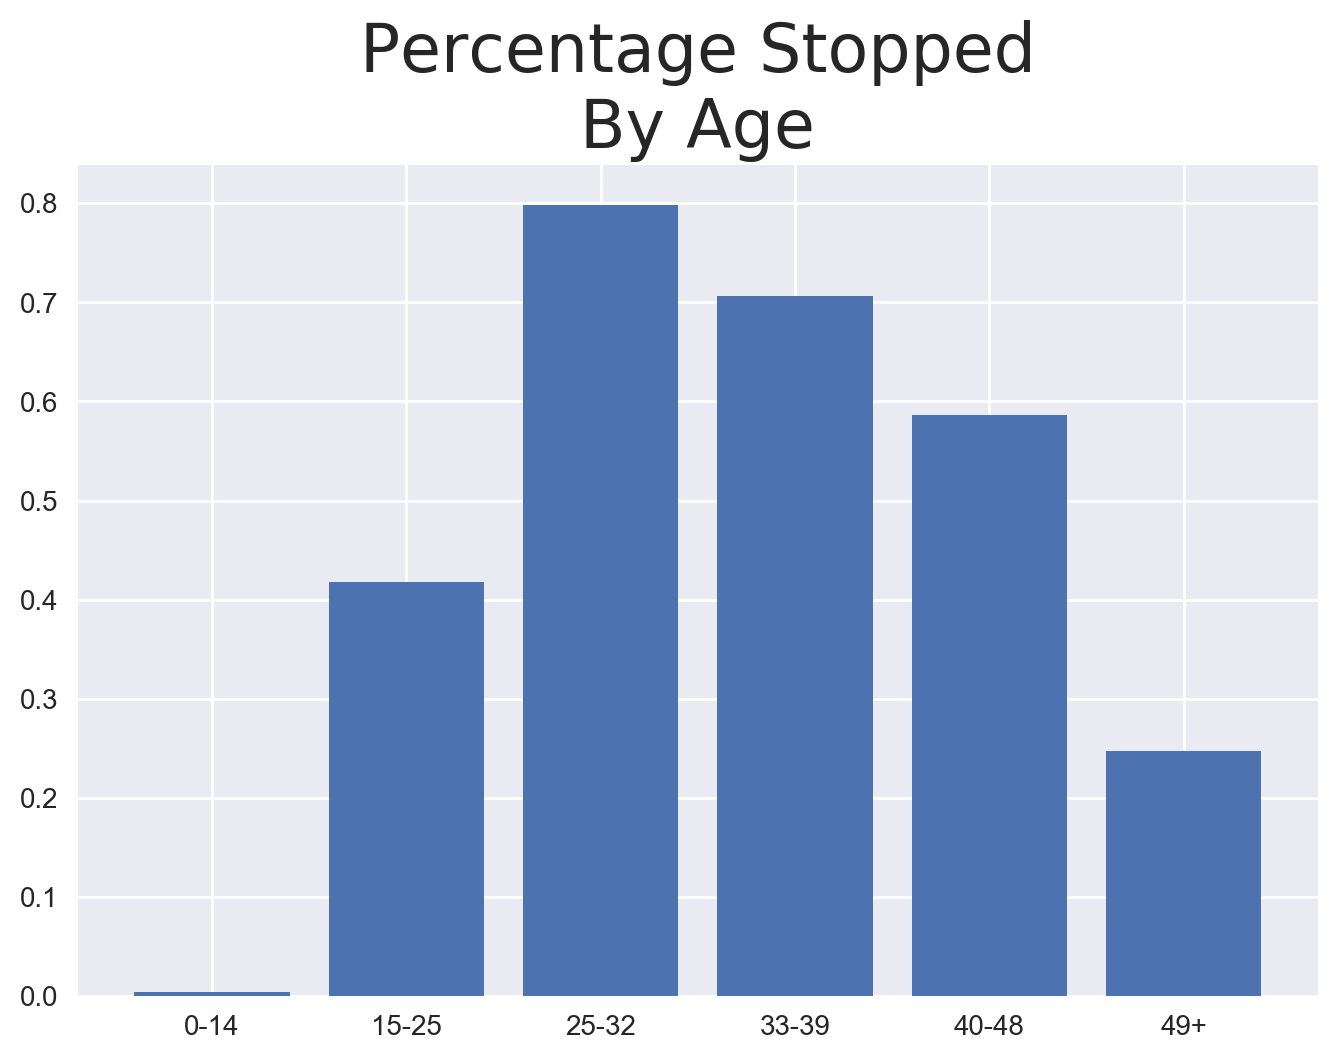

In [198]:
barchart(percentage_stopped_by_age, "Percentage Stopped\nBy Age")

## Question 2.4: What is the probability of being searched by age group, conditional on being stopped?

In [165]:
searches_by_age_group = funnel_df[funnel_df['search_conducted'] == True].groupby('driver_age_raw')['driver_age_raw'].count()
searches_by_age_group

driver_age_raw
0-14        894
15-25    117761
25-32    153598
33-39     81727
40-48     62276
49+       62471
Name: driver_age_raw, dtype: int64

In [169]:
percentage_search_by_age = {k: searches_by_age_group[k] / stops_by_age_group[k] for k in ages}
percentage_search_by_age

{'0-14': 0.036131431111829607,
 '15-25': 0.04858259342044792,
 '25-32': 0.044679168270163556,
 '33-39': 0.030032370593874907,
 '40-48': 0.023079015498917499,
 '49+': 0.019339771152284562}

/usr/local/bin/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Pier Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


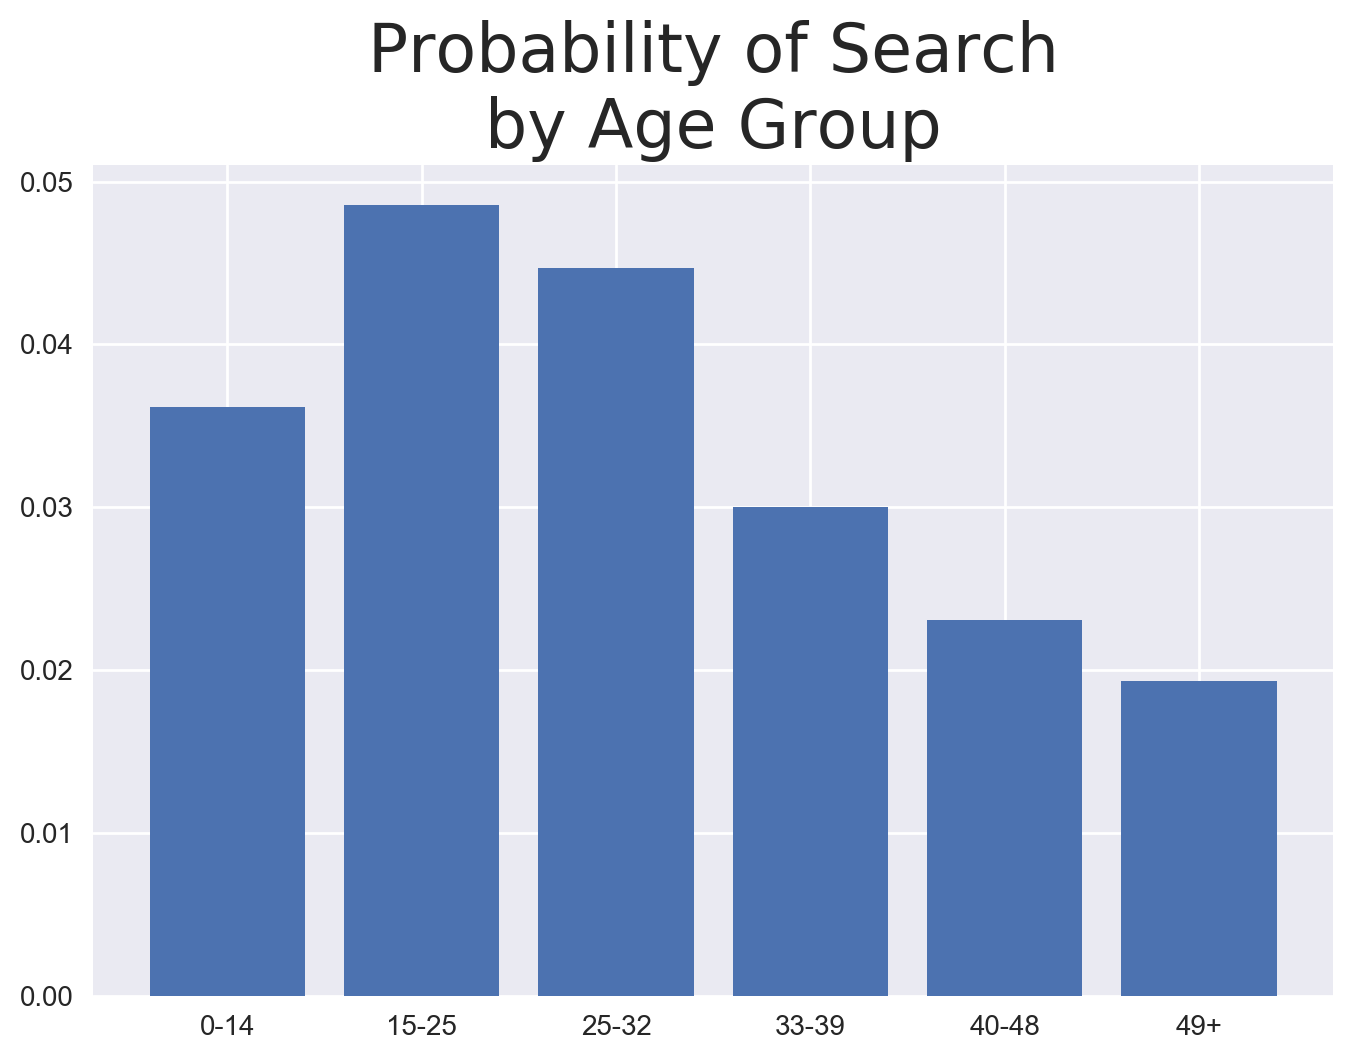

In [191]:
barchart(percentage_search_by_age, "Probability of Search\nby Age Group")

## Question 2.5: What is the probability a driver has contraband by age, conditional on having been pulled over?

In [201]:
contraband_by_age_group = dict(funnel_df[funnel_df['search_conducted'] == True].groupby('driver_age_raw')['contraband_found'].count())
contraband_by_age_group

{'0-14': 91,
 '15-25': 6892,
 '25-32': 6977,
 '33-39': 3602,
 '40-48': 2590,
 '49+': 2283}

In [202]:
percentage_contraband_by_age_group = {k: contraband_by_age_group[k] / searches_by_age_group[k] for k in ages}
percentage_contraband_by_age_group

{'0-14': 0.1017897091722595,
 '15-25': 0.05852531822929493,
 '25-32': 0.045423768538652848,
 '33-39': 0.044073561980740757,
 '40-48': 0.041589055173742694,
 '49+': 0.036544956859983033}

/usr/local/bin/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Pier Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


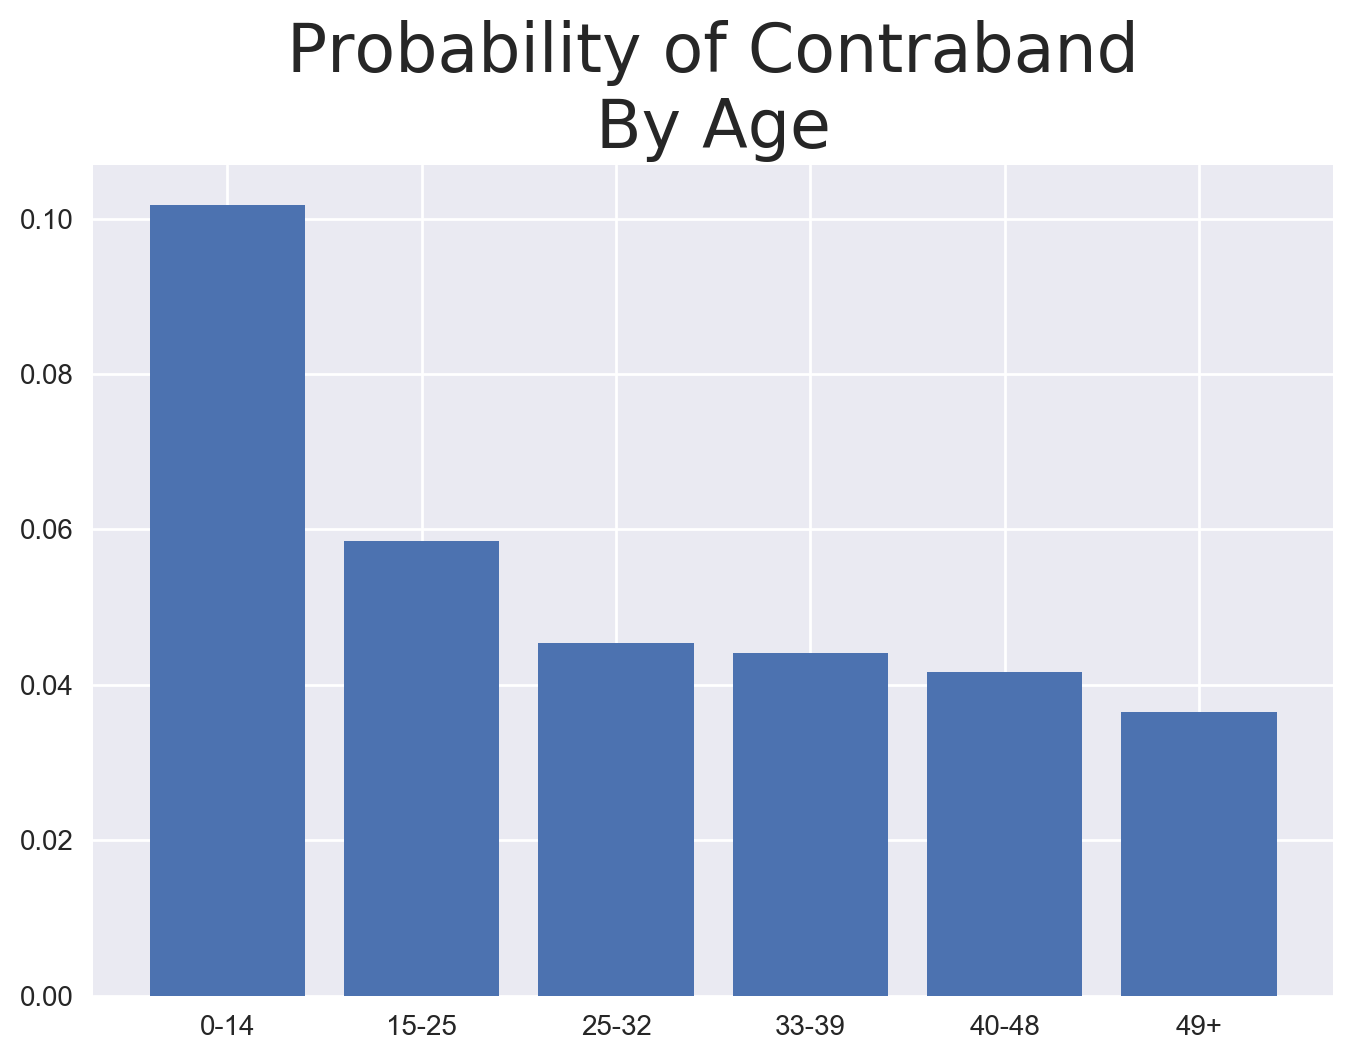

In [203]:
barchart(percentage_contraband_by_age_group, "Probability of Contraband\nBy Age")

## Question 2.6: What is the probability of arrest, given contraband was found?

In [204]:
arrested_by_age_group = dict(funnel_df[funnel_df['contraband_found'] == True].groupby('driver_age_raw')['is_arrested'].count())
arrested_by_age_group

{'0-14': 51,
 '15-25': 5071,
 '25-32': 4813,
 '33-39': 2329,
 '40-48': 1588,
 '49+': 1399}

In [205]:
percentage_arrested_by_age_group = {k: arrested_by_age_group[k] / contraband_by_age_group[k] for k in ages}
percentage_arrested_by_age_group

{'0-14': 0.56043956043956045,
 '15-25': 0.73578061520603599,
 '25-32': 0.68983803927189336,
 '33-39': 0.64658523042754024,
 '40-48': 0.61312741312741315,
 '49+': 0.61279018834866406}

/usr/local/bin/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Pier Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


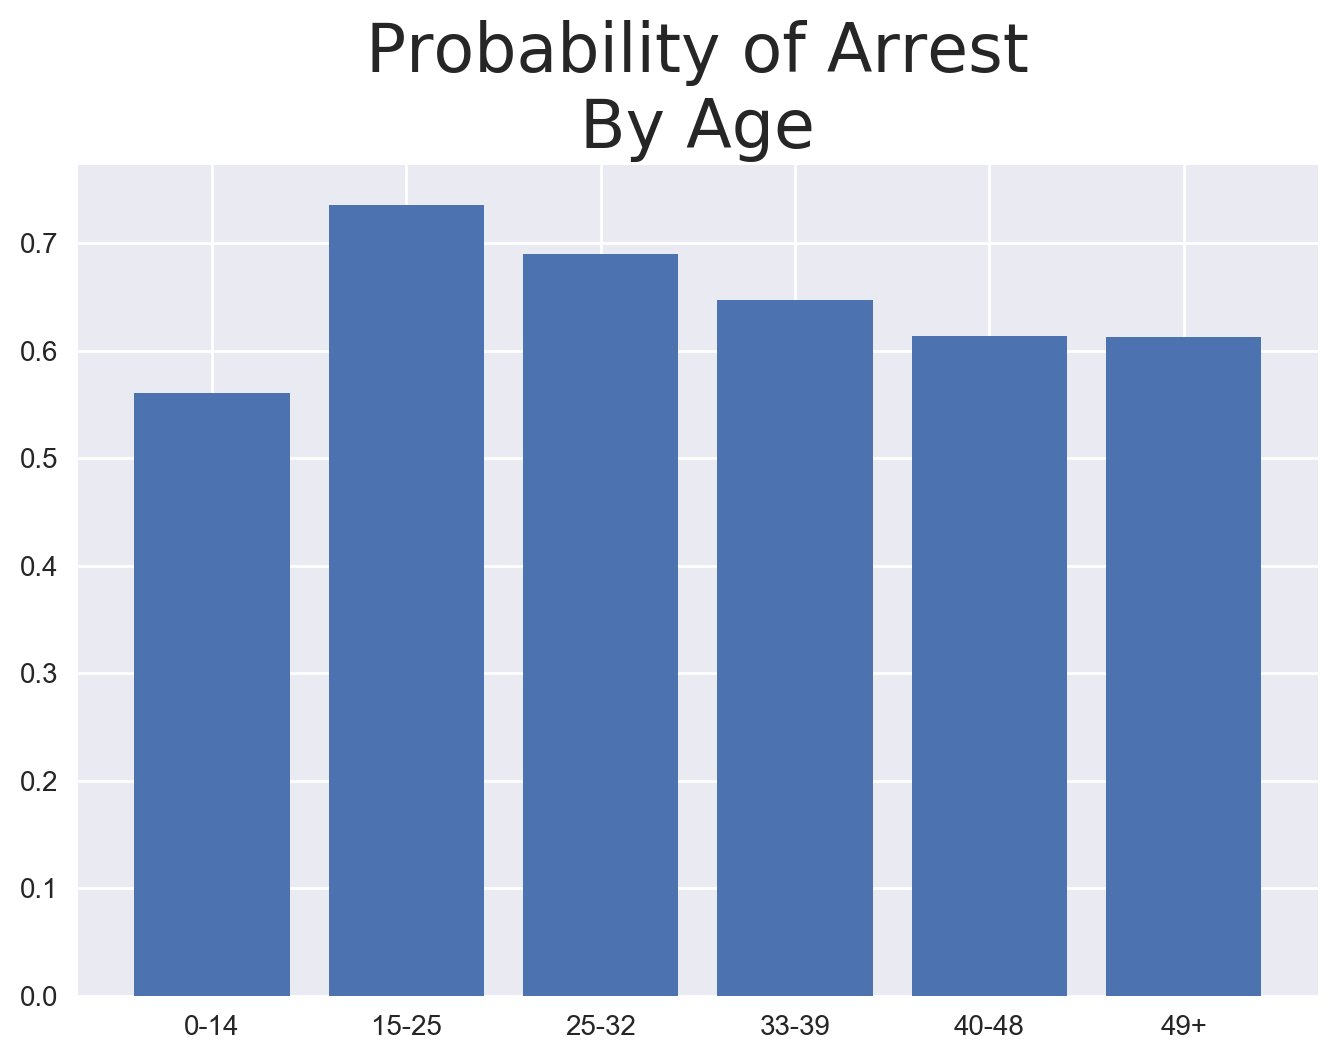

In [206]:
barchart(percentage_arrested_by_age_group, "Probability of Arrest\nBy Age")

In [208]:
gini(percentage_arrested_by_age_group.values())

0.049297585834973123

# Question 3: How is the experience of getting of getting pulled over different across gender? 

In [214]:
population_by_gender = {'M': .498, 'F': .502}
population_by_gender = {k: population_by_gender[k] * total_population for k in population_by_gender}
population_by_gender

{'F': 19728600.0, 'M': 19571400.0}

## Question 3.1: What is the probability of being pulled over by gender group, conditional on living in california?

In [215]:
stopped_by_gender = dict(funnel_df.groupby('driver_gender')['driver_gender'].count())
stopped_by_gender

{'F': 4364257, 'M': 10172081}

In [217]:
percentage_stopped_by_gender = {k: stopped_by_gender[k] / population_by_gender[k] for k in stopped_by_gender}
percentage_stopped_by_gender

{'F': 0.22121473393955982, 'M': 0.51974212371112949}

/usr/local/bin/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Pier Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


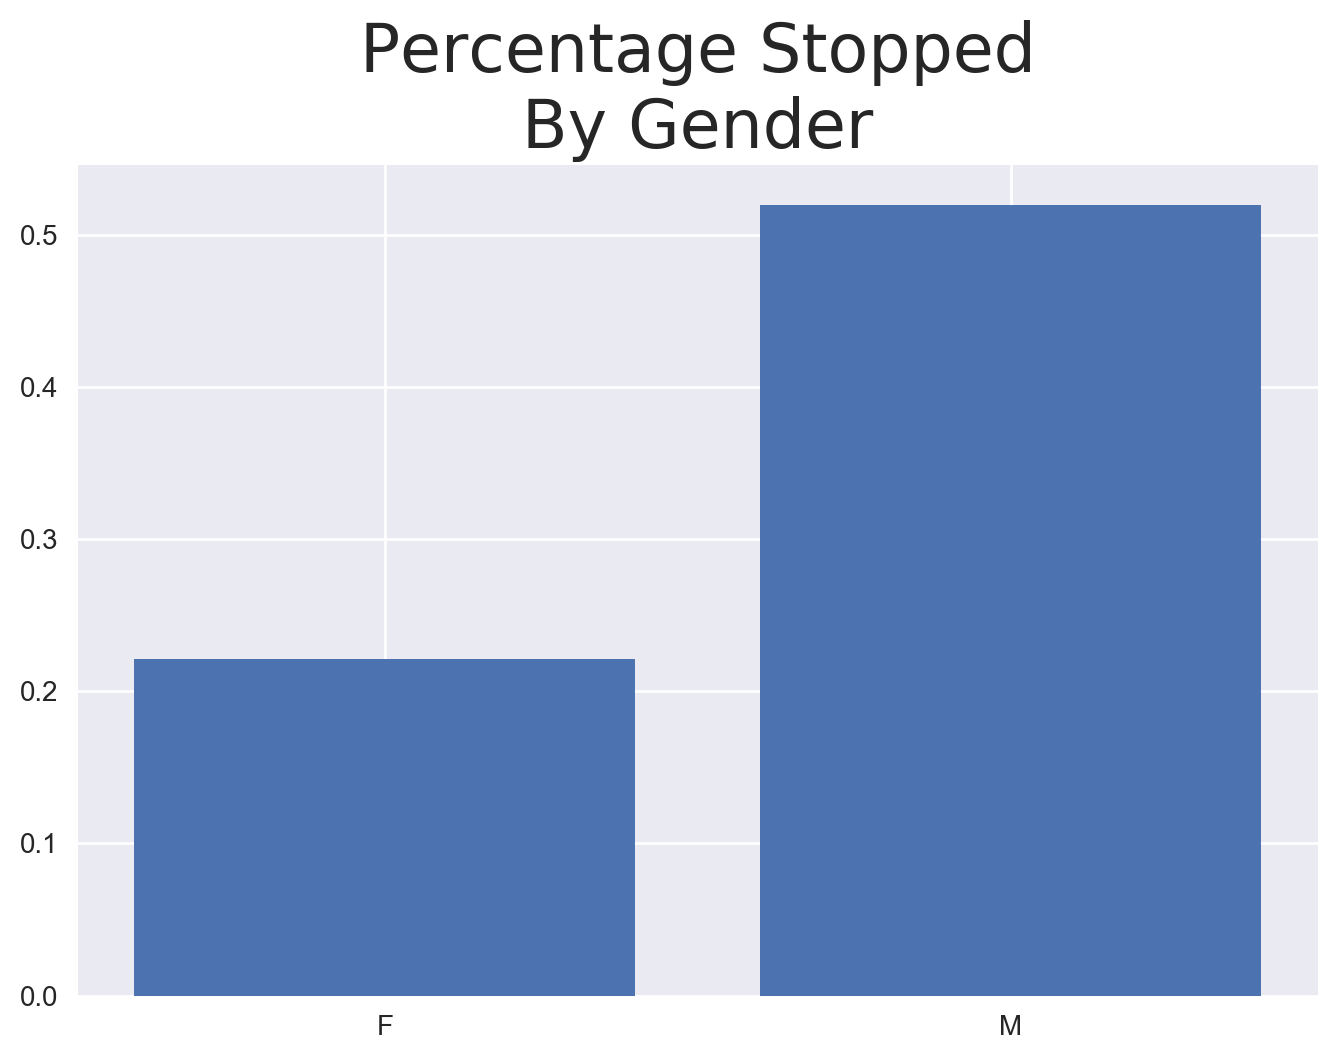

In [218]:
barchart(percentage_stopped_by_gender, "Percentage Stopped\nBy Gender")

## Question 3.2 What is the probability of being searched by gender, conditional on being pulled over?

In [223]:
searched_by_gender = dict(funnel_df[funnel_df['search_conducted'] == True].groupby('driver_gender')['search_conducted'].count())
searched_by_gender

{'F': 110878, 'M': 367849}

In [224]:
percentage_searched_by_gender = {k: searched_by_gender[k] / stopped_by_gender[k] for k in searched_by_gender}
percentage_searched_by_gender

{'F': 0.025405928202670007, 'M': 0.036162610187630242}

/usr/local/bin/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Pier Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


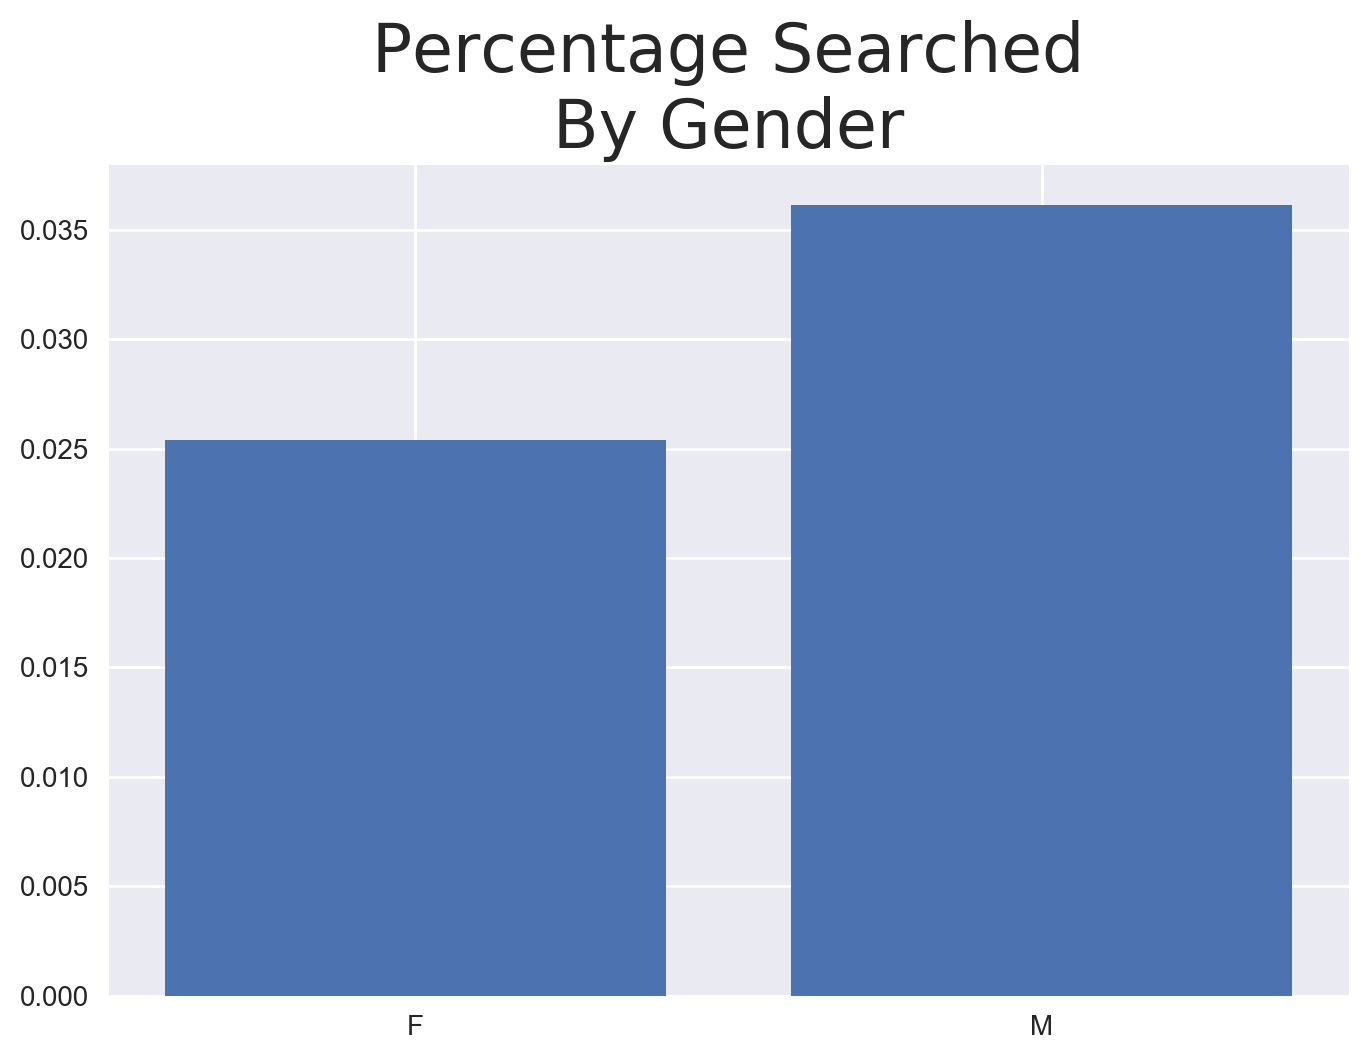

In [225]:
barchart(percentage_searched_by_gender, "Percentage Searched\nBy Gender")

In [232]:
gini(percentage_searched_by_gender.values())

0.087355062538157224

## Question 3.3 What is the probability of contraband by gender, conditional on being searched?

In [228]:
contraband_by_gender = dict(funnel_df[funnel_df['contraband_found'] == True].groupby('driver_gender')['contraband_found'].count())
contraband_by_gender

{'F': 2827, 'M': 12424}

In [229]:
percentage_contraband_by_gender = {k: contraband_by_gender[k] / searched_by_gender[k] for k in contraband_by_gender}
percentage_contraband_by_gender

{'F': 0.025496491639459586, 'M': 0.033774728217284812}

/usr/local/bin/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Pier Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


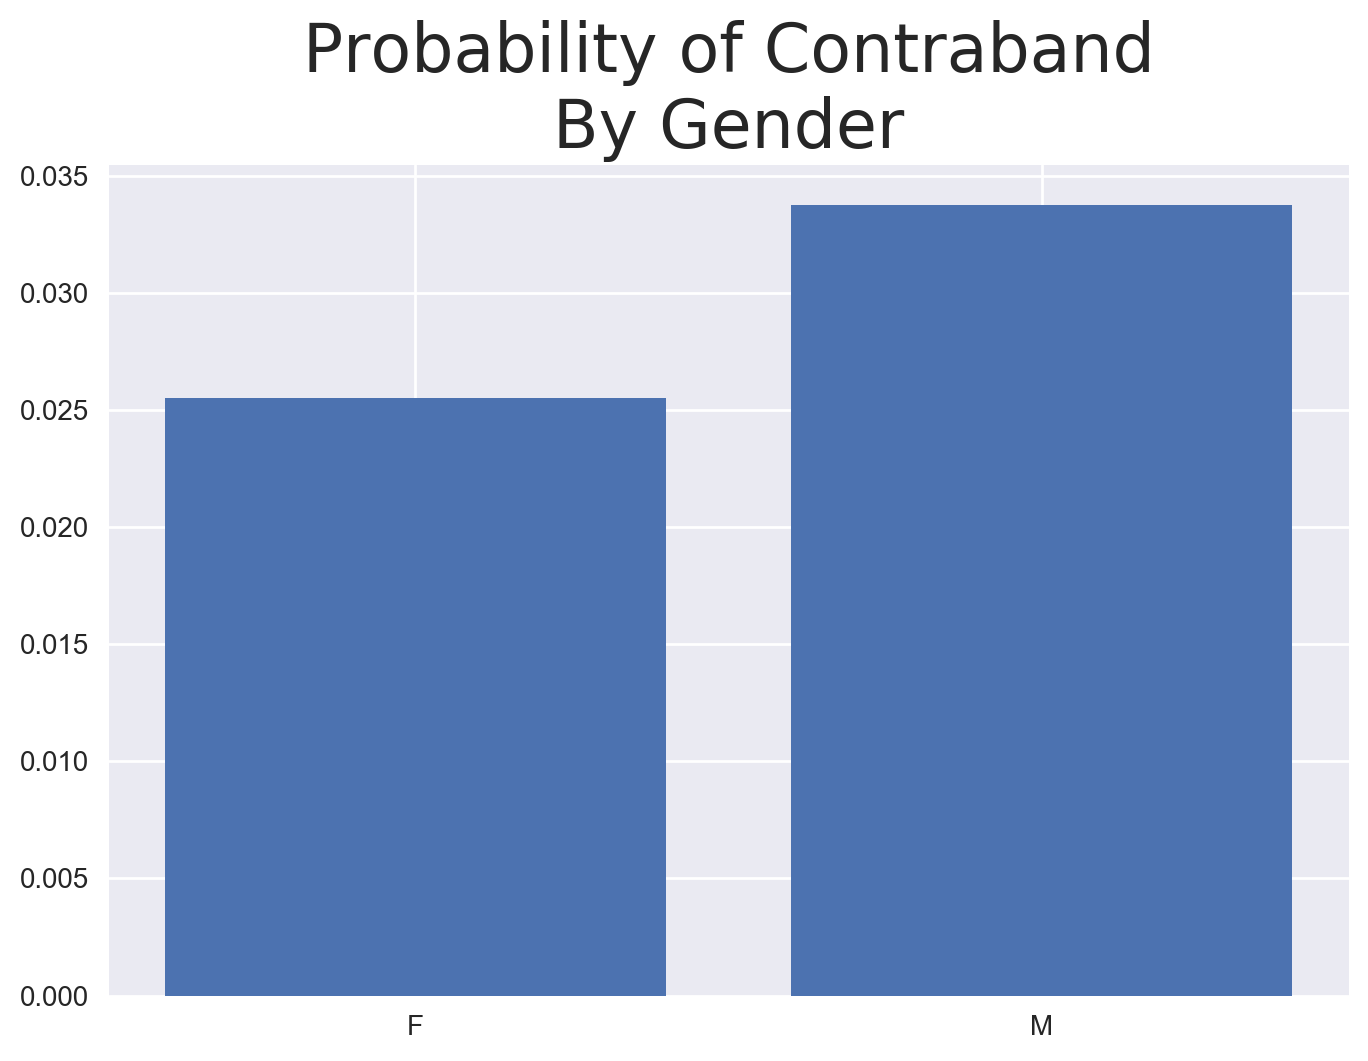

In [230]:
barchart(percentage_contraband_by_gender, "Probability of Contraband\nBy Gender")

In [231]:
gini(percentage_contraband_by_gender.values())

0.069833290630064618